In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = 'all_seasons_2021-2025 raw_visualization_data.xlsx'
df = pd.read_excel(file_path)

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (1472, 278)

First few rows:
        Date            Home   xG  xG.1            Away  Attendance  \
0 2021-08-13       Brentford  1.2   1.3         Arsenal     16479.0   
1 2021-08-14  Manchester Utd  1.5   0.5    Leeds United     72732.0   
2 2021-08-14         Everton  2.4   0.8     Southampton     38487.0   
3 2021-08-14  Leicester City  0.5   1.3          Wolves     31983.0   
4 2021-08-14         Chelsea  0.7   0.2  Crystal Palace     38965.0   

          Home_clean      Away_clean  MP-H.1  xG-H.1  ...  PrgC-A  CPA-A  \
0          Brentford         Arsenal      38    45.8  ...     556    140   
1  Manchester United    Leeds United      38    55.8  ...     700    208   
2            Everton     Southampton      38    41.2  ...     647    187   
3     Leicester City          Wolves      38    47.8  ...     780    190   
4            Chelsea  Crystal Palace      38    63.4  ...     563    135   

   Mis-A  Dis-A  Rec-A  PrgR-A  HomeGoals  AwayGoals  Result     Season 

In [2]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display only columns with missing values
null_counts = null_counts[null_counts > 0]

if null_counts.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values detected:")
    print(null_counts)

Missing values detected:
Attendance       1
PKatt-H.1      712
PrgP-H.1       332
90s-H.1        760
PrgDist-H.1    712
np:G-xG-H       19
90s-A.1        760
90s-A.2        760
# Pl-A         760
90s-A          380
Glsv-A         712
G/So-A         712
dtype: int64


In [3]:
# Drop columns with more than 20 missing values
threshold = 20
df = df.dropna(axis=1, thresh=len(df) - threshold)

# Confirm remaining columns and shape
print("Remaining columns after dropping:")
print(df.columns)
print("New dataset shape:", df.shape)

Remaining columns after dropping:
Index(['Date', 'Home', 'xG', 'xG.1', 'Away', 'Attendance', 'Home_clean',
       'Away_clean', 'MP-H.1', 'xG-H.1',
       ...
       'PrgC-A', 'CPA-A', 'Mis-A', 'Dis-A', 'Rec-A', 'PrgR-A', 'HomeGoals',
       'AwayGoals', 'Result', 'Season'],
      dtype='object', length=268)
New dataset shape: (1472, 268)


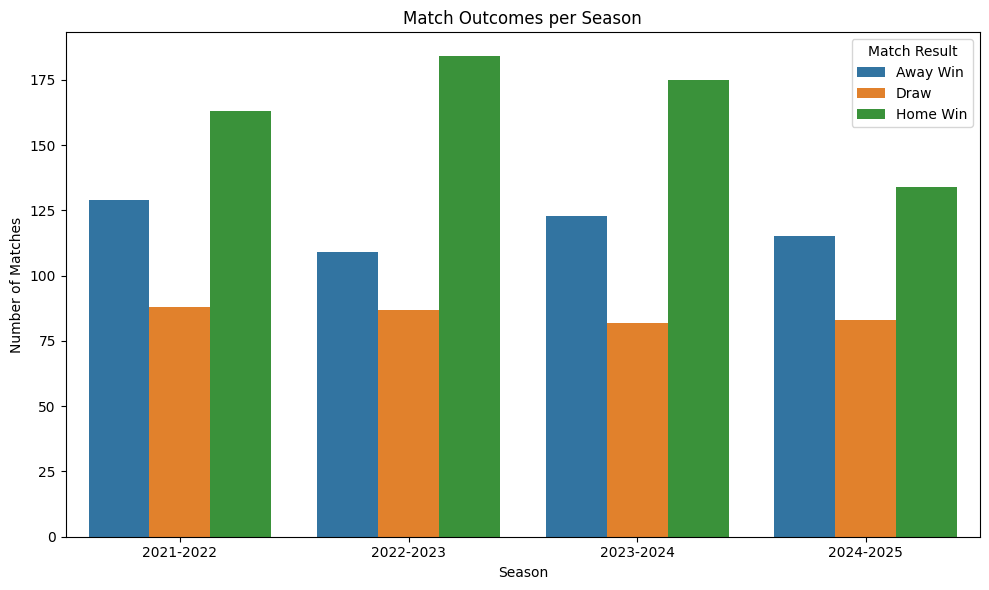

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Season and Result
result_counts = df.groupby(['Season', 'Result']).size().reset_index(name='MatchCount')

# Map result labels
result_map = {1: 'Home Win', 0: 'Draw', -1: 'Away Win'}
result_counts['ResultLabel'] = result_counts['Result'].map(result_map)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=result_counts, x='Season', y='MatchCount', hue='ResultLabel')
plt.title('Match Outcomes per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Match Result')
plt.tight_layout()
plt.show()

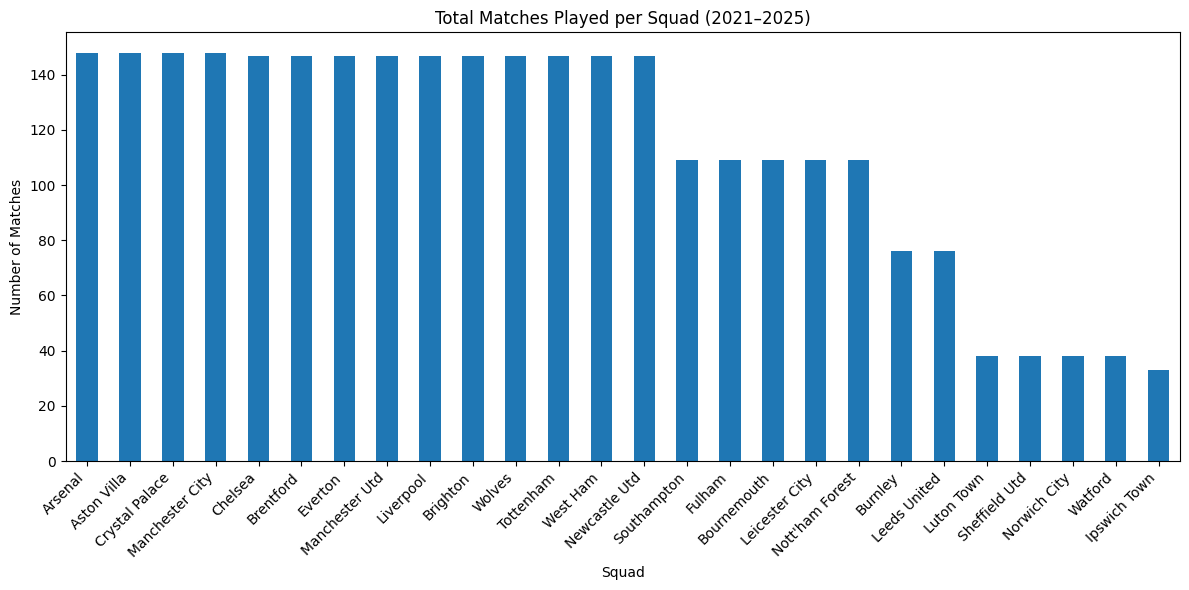

In [5]:
import matplotlib.pyplot as plt

# Count how many times each team appeared as Home or Away
home_counts = df['Home'].value_counts()
away_counts = df['Away'].value_counts()

# Sum both counts
total_matches_per_squad = (home_counts + away_counts).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
total_matches_per_squad.plot(kind='bar')
plt.title('Total Matches Played per Squad (2021–2025)')
plt.xlabel('Squad')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


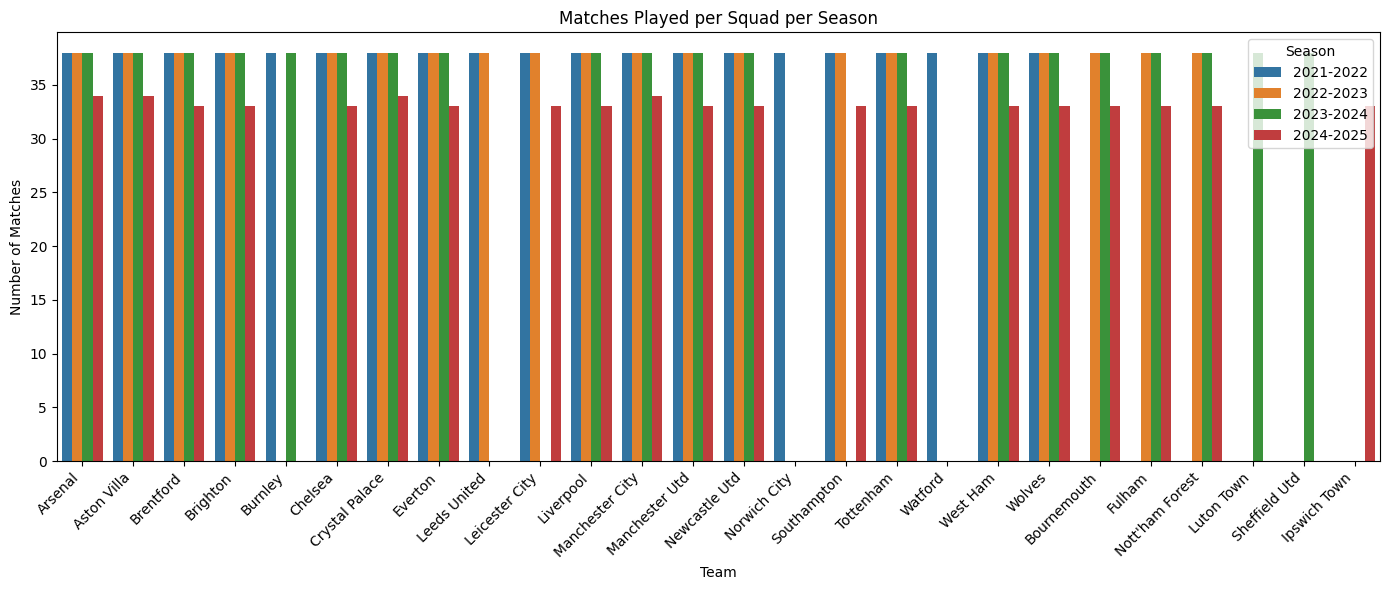

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count home and away matches per team per season
home_counts = df.groupby(['Season', 'Home']).size().reset_index(name='HomeMatches')
away_counts = df.groupby(['Season', 'Away']).size().reset_index(name='AwayMatches')

# Merge and sum home + away
team_season_counts = pd.merge(home_counts, away_counts, left_on=['Season', 'Home'], right_on=['Season', 'Away'], how='outer')
team_season_counts['Team'] = team_season_counts['Home'].combine_first(team_season_counts['Away'])
team_season_counts['Matches'] = team_season_counts['HomeMatches'].fillna(0) + team_season_counts['AwayMatches'].fillna(0)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=team_season_counts, x='Team', y='Matches', hue='Season')
plt.title('Matches Played per Squad per Season')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.tight_layout()
plt.show()


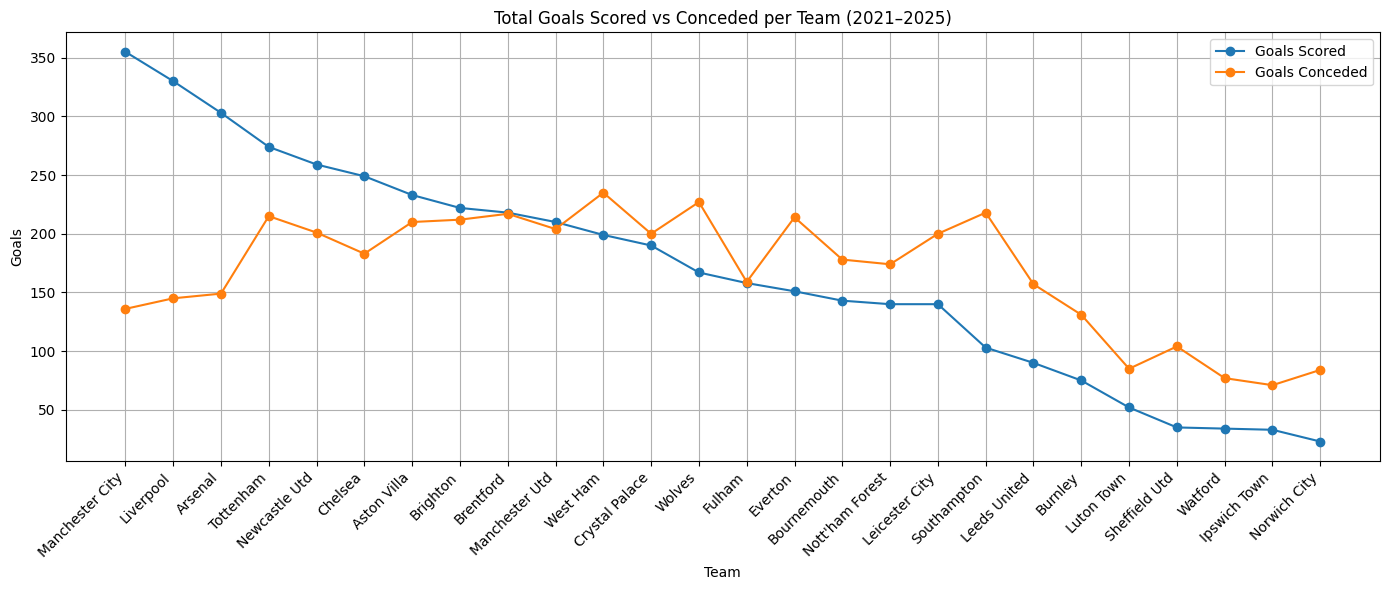

In [7]:
# Aggregate total goals scored and conceded per team
goals_scored = df.groupby('Home')['HomeGoals'].sum() + df.groupby('Away')['AwayGoals'].sum()
goals_conceded = df.groupby('Home')['AwayGoals'].sum() + df.groupby('Away')['HomeGoals'].sum()

# Combine into one DataFrame
team_goals = pd.DataFrame({
    'Goals Scored': goals_scored,
    'Goals Conceded': goals_conceded
}).fillna(0)

# Sort by goals scored for consistent x-axis
team_goals = team_goals.sort_values(by='Goals Scored', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(team_goals.index, team_goals['Goals Scored'], marker='o', label='Goals Scored')
plt.plot(team_goals.index, team_goals['Goals Conceded'], marker='o', label='Goals Conceded')
plt.title('Total Goals Scored vs Conceded per Team (2021–2025)')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

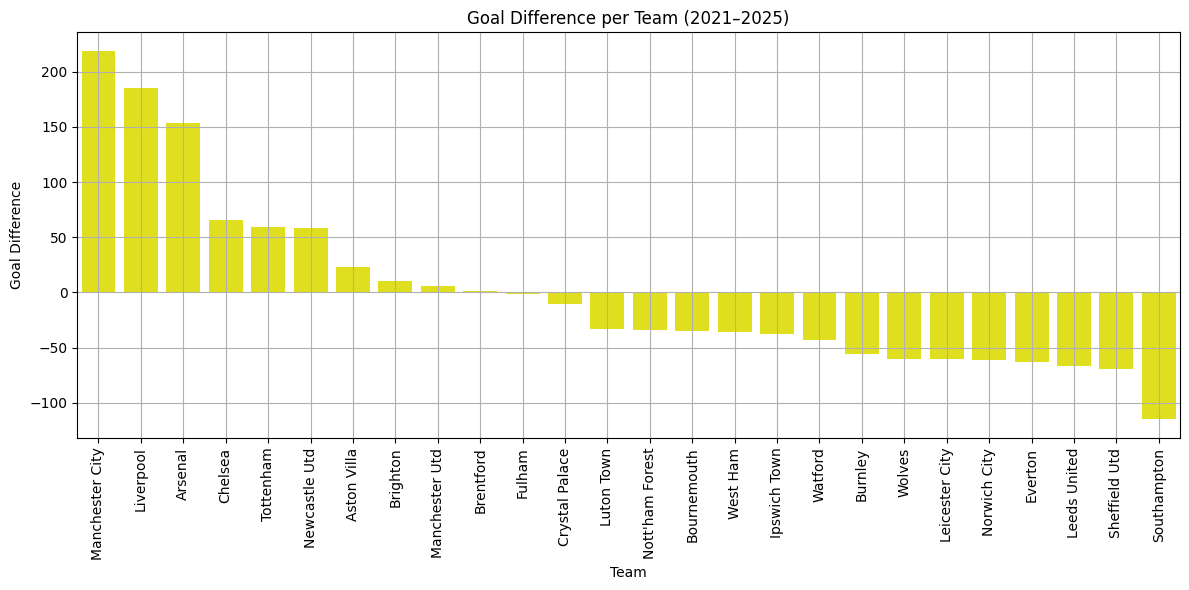

In [8]:
import seaborn as sns

# Calculate total goals scored and conceded per team
goals_scored = df.groupby('Home')['HomeGoals'].sum() + df.groupby('Away')['AwayGoals'].sum()
goals_conceded = df.groupby('Home')['AwayGoals'].sum() + df.groupby('Away')['HomeGoals'].sum()

# Create DataFrame
goal_diff_df = pd.DataFrame({
    'Team': goals_scored.index,
    'Goals Scored': goals_scored.values,
    'Goals Conceded': goals_conceded.values
})
goal_diff_df['Goal Difference'] = goal_diff_df['Goals Scored'] - goal_diff_df['Goals Conceded']
goal_diff_df = goal_diff_df.sort_values('Goal Difference', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Goal Difference', data=goal_diff_df, color='yellow')
plt.title('Goal Difference per Team (2021–2025)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

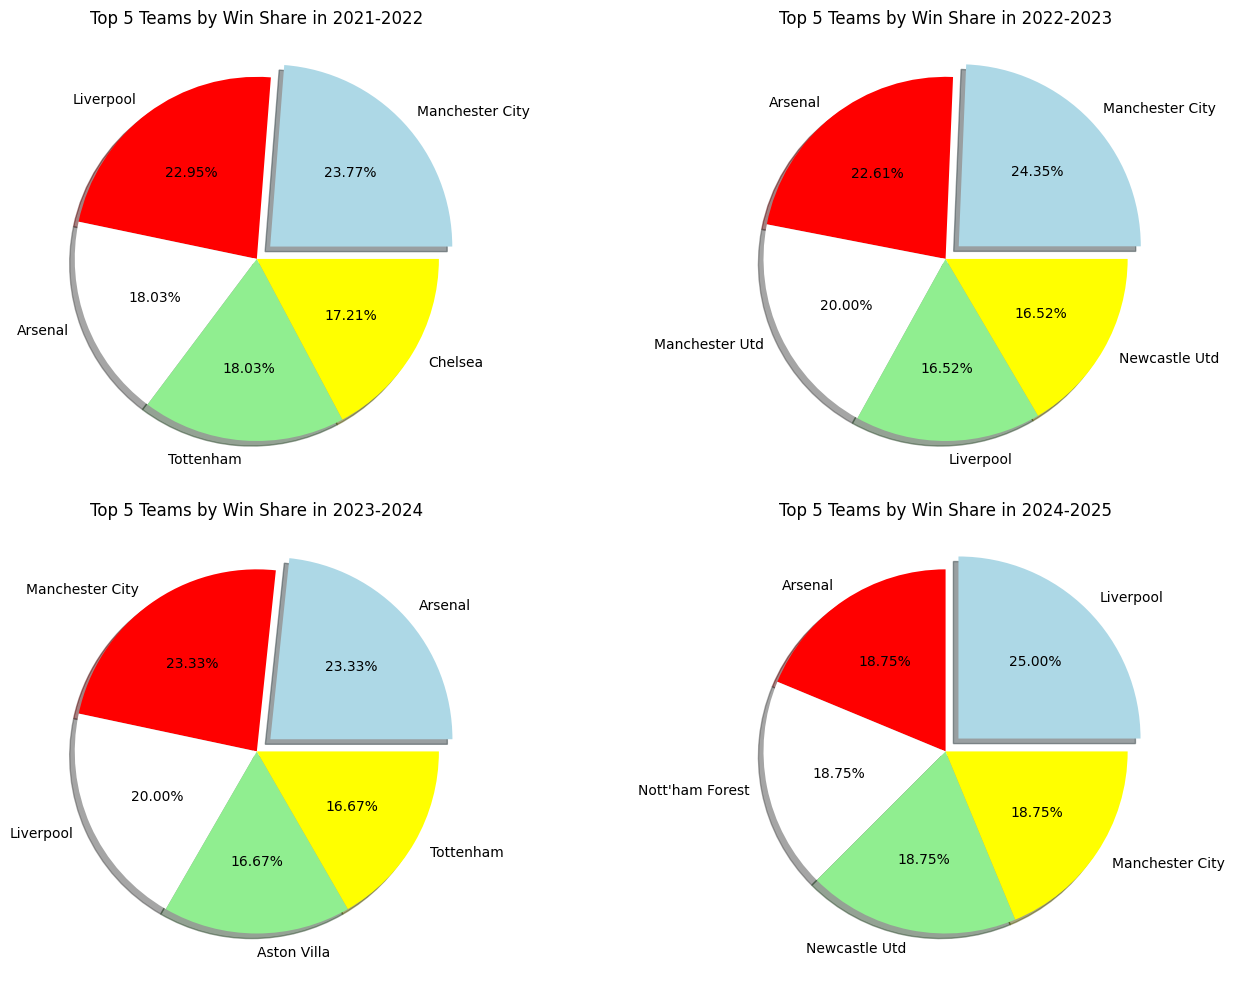

In [9]:
# Load the dataset again
file_path = 'all_seasons_simple_concat_2021_2025.xlsx'
df = pd.read_excel(file_path)

# Prepare a subplot per season
seasons = df['Season'].unique()
seasons.sort()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, season in enumerate(seasons):
    df_season = df[df['Season'] == season]

    # Count wins per team
    home_wins = df_season[df_season['Result'] == 1]['Home'].value_counts()
    away_wins = df_season[df_season['Result'] == -1]['Away'].value_counts()
    total_wins = (home_wins + away_wins).fillna(0)

    # Top 5 teams by win count
    top5 = total_wins.sort_values(ascending=False).head(5)
    teams = top5.index
    win_counts = top5.values

    # Pie chart
    colors = ['lightblue', 'red', 'white', 'lightgreen', 'yellow']
    explode = (0.1, 0, 0, 0, 0)

    axes[i].pie(win_counts, labels=teams, autopct='%1.2f%%', explode=explode,
                shadow=True, colors=colors)
    axes[i].set_title(f"Top 5 Teams by Win Share in {season}")

plt.tight_layout()
plt.show()


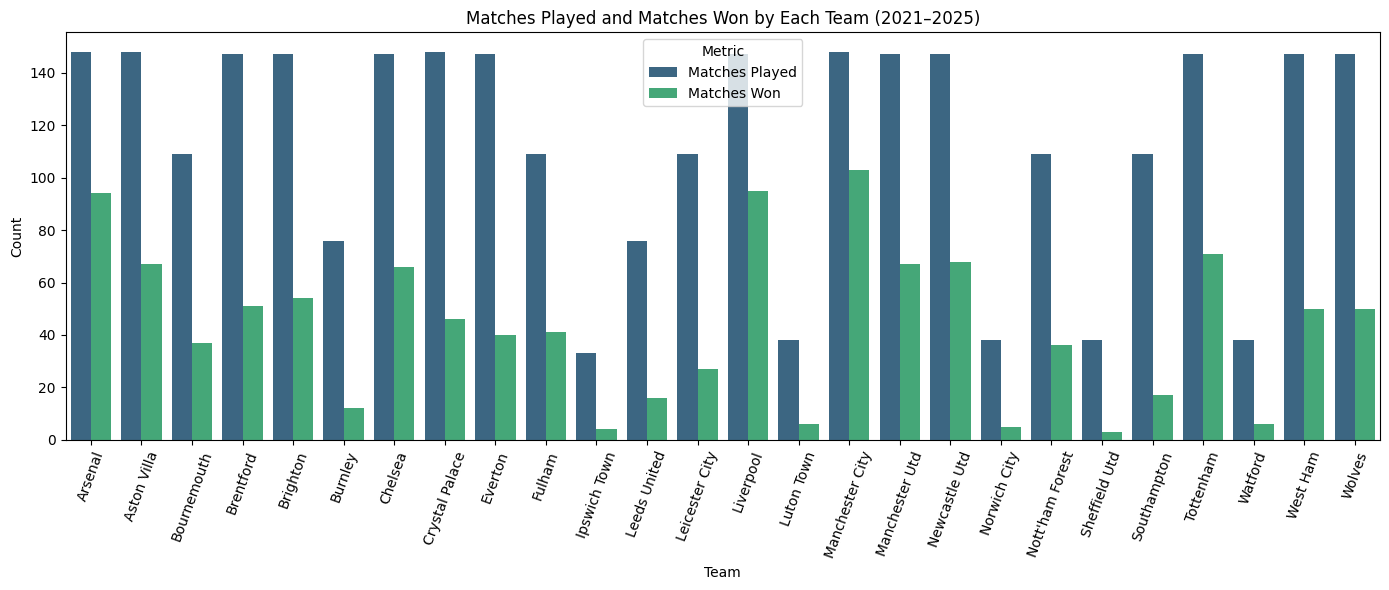

In [10]:
# Total matches played: home + away counts
home_played = df['Home'].value_counts()
away_played = df['Away'].value_counts()
matches_played = (home_played + away_played).fillna(0)

# Total matches won: home wins (Result = 1), away wins (Result = -1)
home_wins = df[df['Result'] == 1]['Home'].value_counts()
away_wins = df[df['Result'] == -1]['Away'].value_counts()
matches_won = (home_wins + away_wins).fillna(0)

# Combine into DataFrame
team_stats = pd.DataFrame({
    'Team': matches_played.index,
    'Matches Played': matches_played.values,
    'Matches Won': matches_won.reindex(matches_played.index).fillna(0).values
})

# Melt for plotting
team_stats_melted = team_stats.melt(id_vars='Team', value_vars=['Matches Played', 'Matches Won'],
                                    var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=team_stats_melted, x='Team', y='Value', hue='Metric', palette='viridis')
plt.title('Matches Played and Matches Won by Each Team (2021–2025)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

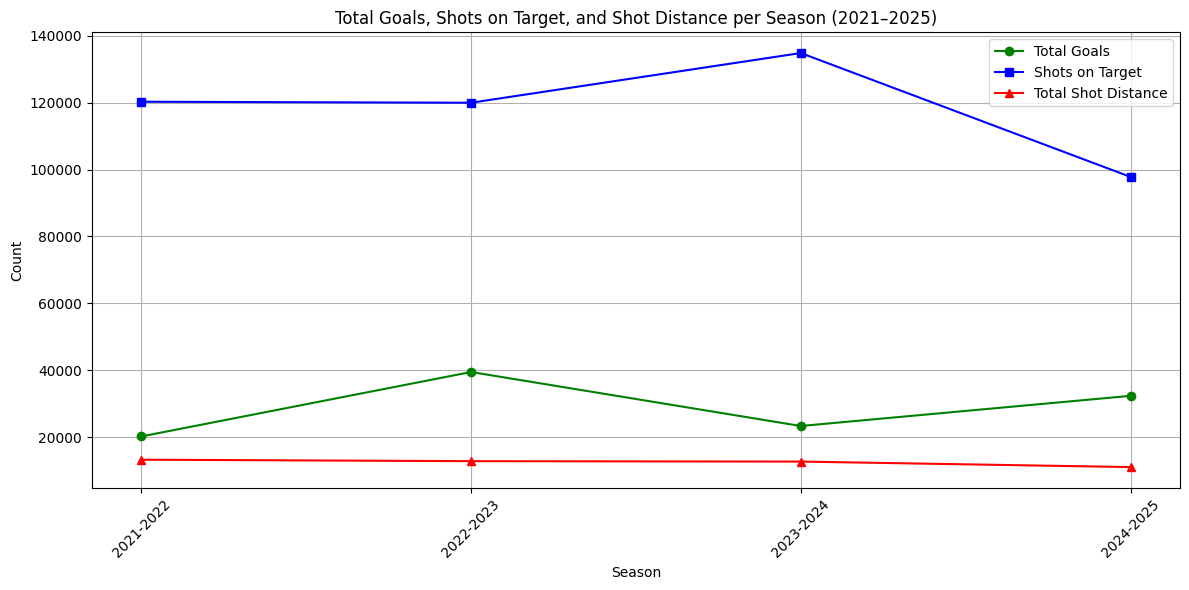

In [11]:
# Convert 'Season' to a consistent string format
df['Season'] = df['Season'].astype(str)

# Aggregate total goals and shot-related stats per season
season_stats = df.groupby('Season').agg({
    'Gls-H': 'sum',
    'Gls-A': 'sum',
    'SoT-H': 'sum',
    'SoT-A': 'sum',
    'Dist-H': 'sum',
    'Dist-A': 'sum'
}).reset_index()

# Rename and compute totals
season_stats['Total Goals'] = season_stats['Gls-H'] + season_stats['Gls-A']
season_stats['Shots on Target'] = season_stats['SoT-H'] + season_stats['SoT-A']
season_stats['Total Shot Distance'] = season_stats['Dist-H'] + season_stats['Dist-A']

# Final columns to plot
season_stats_final = season_stats[['Season', 'Total Goals', 'Shots on Target', 'Total Shot Distance']]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(season_stats_final['Season'], season_stats_final['Total Goals'], label='Total Goals', color='green', marker='o')
plt.plot(season_stats_final['Season'], season_stats_final['Shots on Target'], label='Shots on Target', color='blue', marker='s')
plt.plot(season_stats_final['Season'], season_stats_final['Total Shot Distance'], label='Total Shot Distance', color='red', marker='^')

plt.title("Total Goals, Shots on Target, and Shot Distance per Season (2021–2025)")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


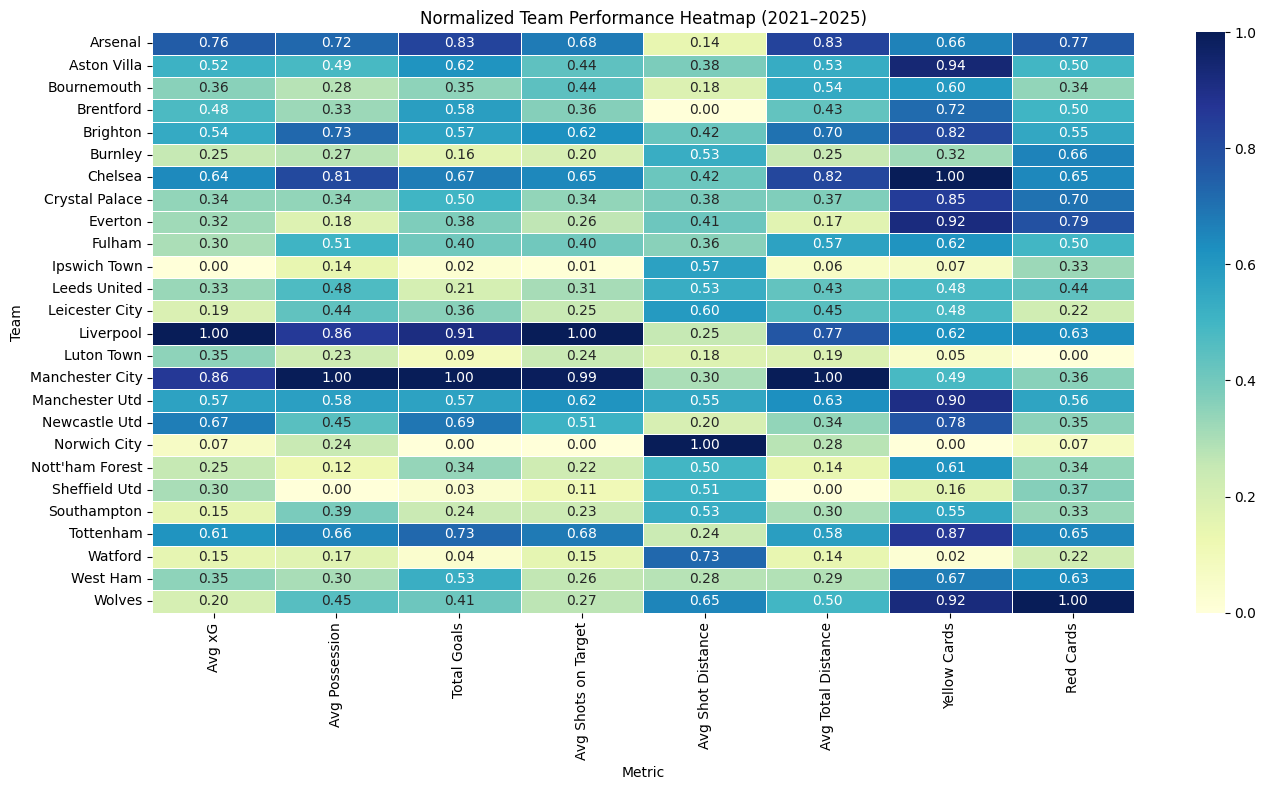

In [12]:
# Calculate average stats per team across all seasons
df['Team'] = df['Home']  # use 'Home' to represent the team stats for simplicity

# Aggregate team stats
team_summary = df.groupby('Team').agg({
    'xG-H': 'mean',
    'Poss-H': 'mean',
    'Gls-H': 'sum',
    'SoT-H': 'mean',
    'Dist-H': 'mean',
    'TotDist-H': 'mean',
    'CrdY-H': 'sum',
    'CrdR-H': 'sum'
}).reset_index()

# Rename for clarity
team_summary.columns = ['Team', 'Avg xG', 'Avg Possession', 'Total Goals', 'Avg Shots on Target',
                        'Avg Shot Distance', 'Avg Total Distance', 'Yellow Cards', 'Red Cards']

# Melt for heatmap
heatmap_data = team_summary.set_index('Team')

# Normalize the data for better color contrast
normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(normalized, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Normalized Team Performance Heatmap (2021–2025)')
plt.ylabel('Team')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_excel('all_seasons_simple_concat_2021_2025.xlsx')

# Aggregate goals per team per season
home_goals = df.groupby(['Season', 'Home'])['HomeGoals'].sum().reset_index()
home_goals.columns = ['Season', 'Team', 'Goals_H']

away_goals = df.groupby(['Season', 'Away'])['AwayGoals'].sum().reset_index()
away_goals.columns = ['Season', 'Team', 'Goals_A']

# Merge and calculate total
total_goals = pd.merge(home_goals, away_goals, on=['Season', 'Team'], how='outer').fillna(0)
total_goals['TotalGoals'] = total_goals['Goals_H'] + total_goals['Goals_A']
total_goals = total_goals[['Season', 'Team', 'TotalGoals']]

# Create the animation
fig = px.bar(
    total_goals.sort_values(['Season', 'TotalGoals'], ascending=[True, False]),
    x='Team', y='TotalGoals', color='Team',
    animation_frame='Season',
    range_y=[0, total_goals['TotalGoals'].max() + 10],
    title='Top Scoring Teams per Season (2021–2025)',
    labels={'TotalGoals': 'Total Goals'},
    height=600
)

# Set slower animation transition and frame duration (in milliseconds)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 4000  # 2 seconds per frame
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 3000  # 1 sec transition

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

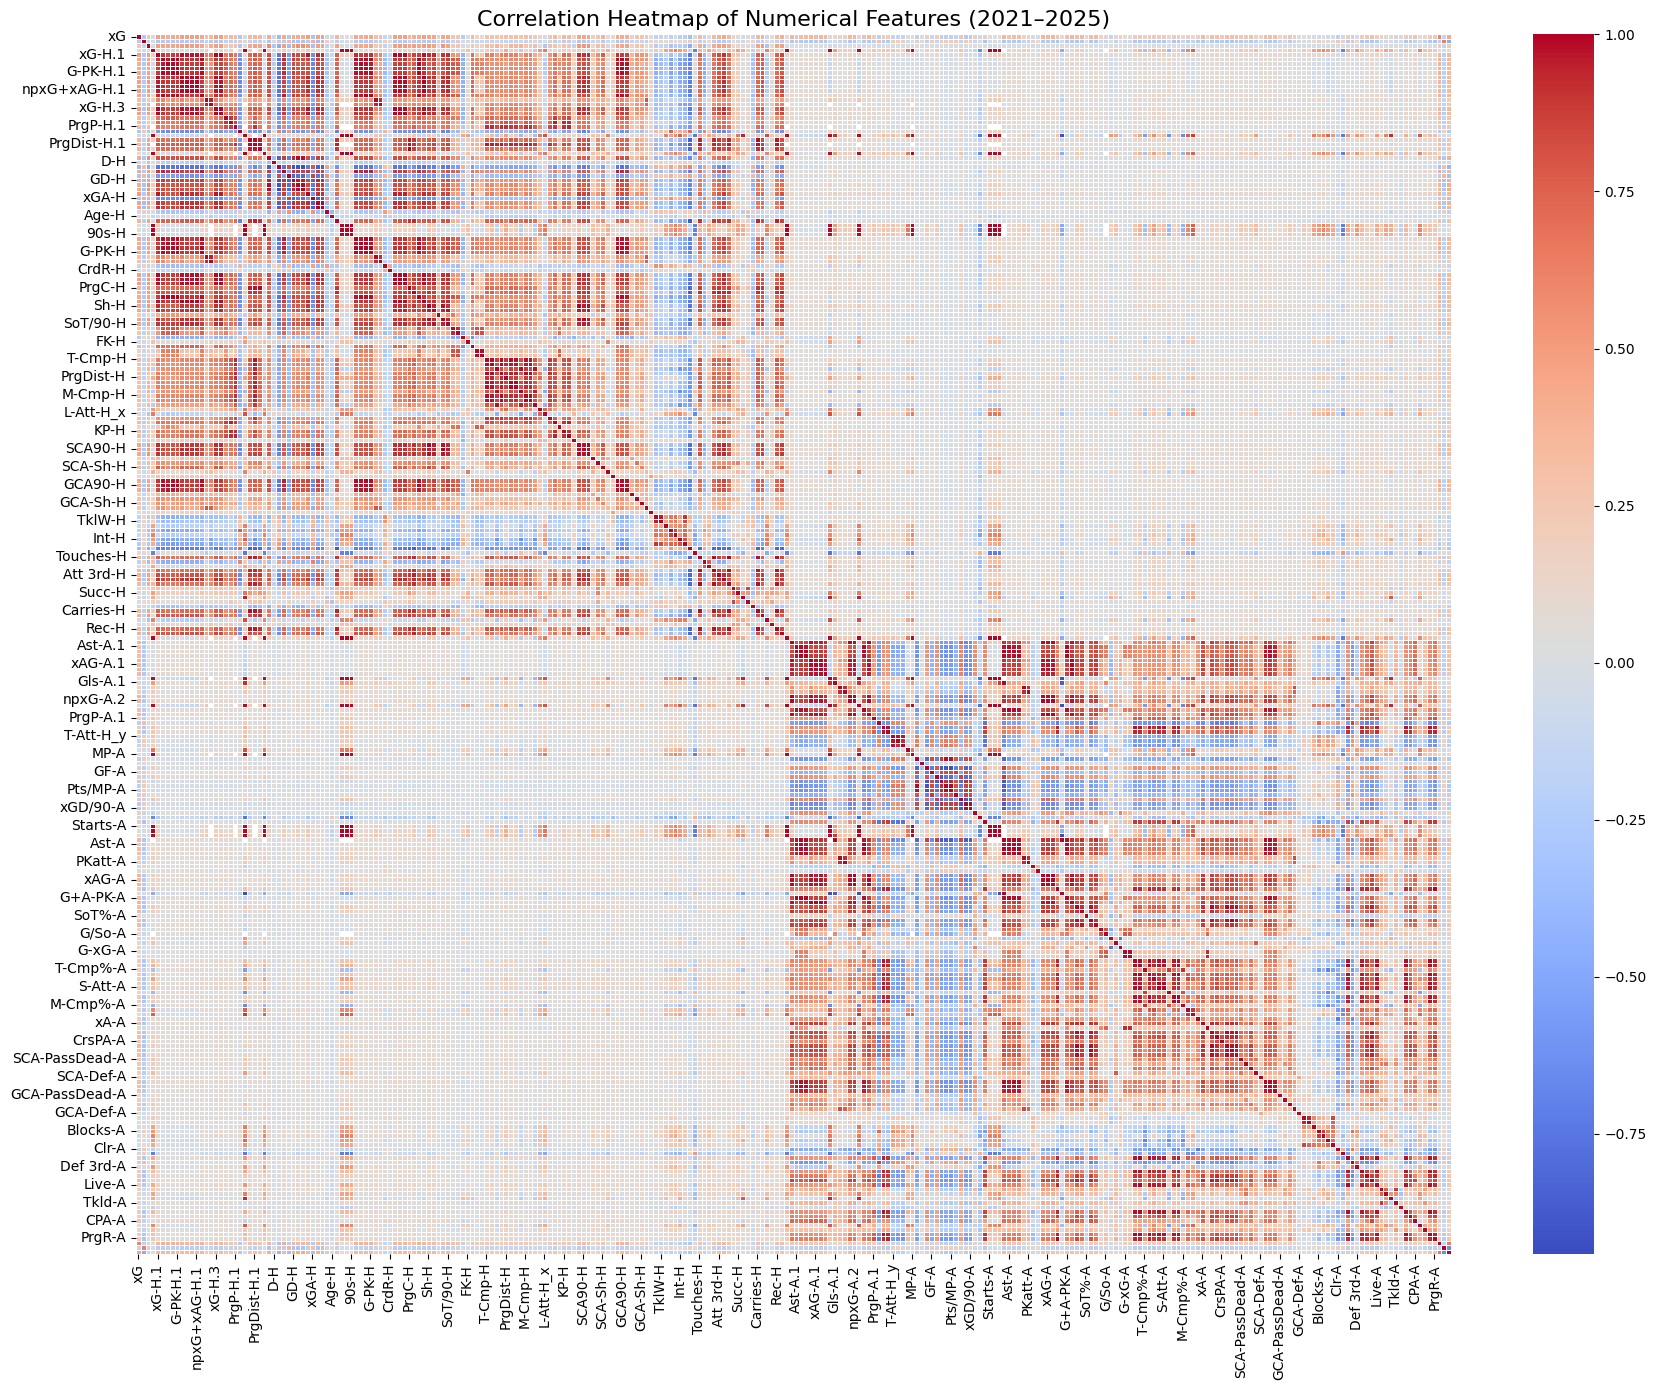

In [14]:
# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (2021–2025)', fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute full correlation matrix
corr_matrix = numeric_df.corr()

# 1. Identify features weakly correlated with the target
target_corr = corr_matrix['Result'].abs()
low_corr_features = target_corr[target_corr < 0.05].index.tolist()

# 2. Identify highly correlated feature pairs (redundant)
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# 3. Combine and drop both types
features_to_drop = list(set(low_corr_features + redundant_features))
df_reduced = df.drop(columns=features_to_drop)

# 4. Report
print("Dropped due to low correlation with 'Result':", low_corr_features)
print("Dropped due to high correlation with other features:", redundant_features)
print("Final shape of cleaned dataset:", df_reduced.shape)


Dropped due to low correlation with 'Result': ['MP-H.1', '90s-H.1', 'MP-H', 'D-H', 'Age-H', 'Starts-H', 'Min-H', '90s-H', 'Def 3rd-H', 'Succ%-H', 'Tkld-H', 'MP-A.1', '90s-A.1', '90s-A.2', 'MP-A', 'D-A', 'Age-A', 'Starts-A', 'Min-A', '90s-A', 'SoT%-A', 'Tackle-Tkl-A', 'TklW-A', 'Pass-A', 'Tkl+Int-A', 'Succ%-A', 'Tkld%-A']
Dropped due to high correlation with other features: ['Ast-H.1', 'G+A-H.1', 'G-PK-H.1', 'xG-H.2', 'xAG-H.1', 'npxG-H.1', 'npxG+xAG-H.1', 'Gls-H.2', 'xG-H.3', 'npxG-H.2', '90s-H.1', 'PrgDist-H.1', 'PrgC-H.1', 'MP-H', 'GF-H', 'Pts-H', 'Pts/MP-H', 'xG-H', 'xGD/90-H', 'Starts-H', 'Min-H', '90s-H', 'Gls-H', 'Ast-H', 'G+A-H', 'G-PK-H', 'PK-H', 'PKatt-H', 'npxG-H', 'xAG-H', 'npxG+xAG-H', 'PrgC-H', 'G+A-PK-H', 'xG+xAG-H', 'SoT-H', 'Sh/90-H', 'SoT/90-H', 'np:G-xG-H', 'T-Cmp-H', 'T-Att-H_x', 'TotDist-H', 'S-Cmp-H', 'S-Att-H_x', 'S-Cmp%-H', 'M-Cmp-H', 'M-Att-H_x', 'M-Cmp%-H', 'xA-H', 'SCA-H', 'SCA90-H', 'SCA-PassLive-H', 'GCA-H', 'GCA90-H', 'GCA-PassLive-H', 'TklW-H', 'Touches-H'

In [16]:
# Display the shape and first few rows of the cleaned dataset
print("Shape of cleaned dataset:", df_reduced.shape)
df_reduced.head()


Shape of cleaned dataset: (1472, 143)


,Date,Home,xG,xG.1,Away,Attendance,Home_clean,Away_clean,xG-H.1,Gls-H.1,...,Succ-A,Tkld-A,PrgC-A,CPA-A,Mis-A,Dis-A,HomeGoals,AwayGoals,Result,Season
0,2021-08-13,Brentford,1.2,1.3,Arsenal,16479.0,Brentford,Arsenal,45.8,1.21,...,256,244,556,140,550,296,2,0,1,2021-2022
1,2021-08-14,Manchester Utd,1.5,0.5,Leeds United,72732.0,Manchester United,Leeds United,55.8,1.47,...,478,408,700,208,675,379,5,1,1,2021-2022
2,2021-08-14,Everton,2.4,0.8,Southampton,38487.0,Everton,Southampton,41.2,1.11,...,333,248,647,187,659,354,3,1,1,2021-2022
3,2021-08-14,Leicester City,0.5,1.3,Wolves,31983.0,Leicester City,Wolves,47.8,1.63,...,398,273,780,190,501,400,1,0,1,2021-2022
4,2021-08-14,Chelsea,0.7,0.2,Crystal Palace,38965.0,Chelsea,Crystal Palace,63.4,1.97,...,302,273,563,135,652,364,3,0,1,2021-2022


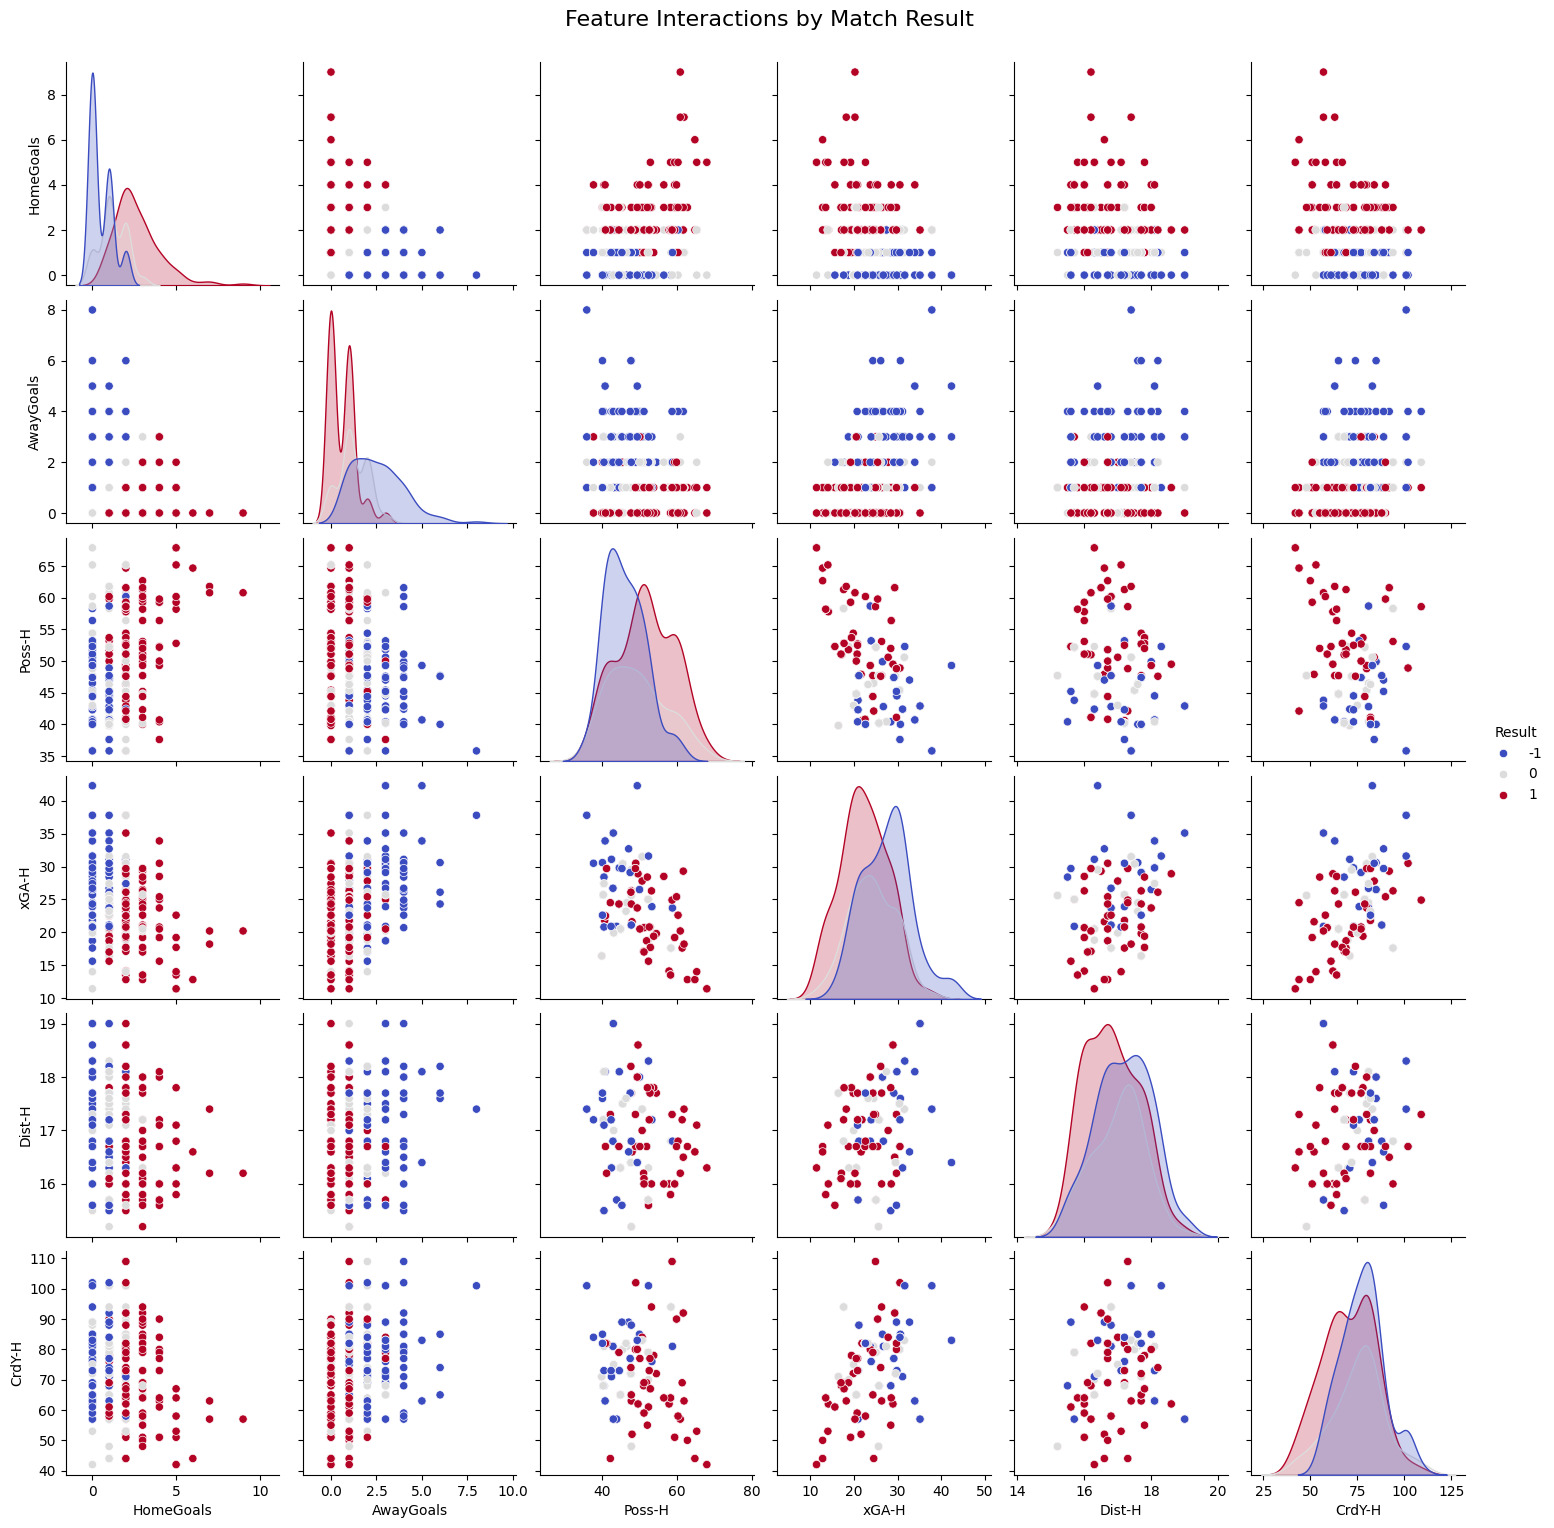

In [17]:
# Select a handful of useful features for visualization
selected_cols = [
    'Result',          # target
    'HomeGoals',       # direct outcome
    'AwayGoals',
    'Poss-H',          # possession
    'xGA-H',           # expected goals against
    'Dist-H',          # average shot distance
    'xG+A-A',          # xG + xA away (if retained)
    'CrdY-H'           # discipline
]

# Keep only those that exist
selected_cols = [col for col in selected_cols if col in df_reduced.columns]

# Sample small subset for faster plotting (optional)
sample_df = df_reduced[selected_cols].sample(n=300, random_state=42)

# Plot
sns.pairplot(sample_df, hue='Result', palette='coolwarm', diag_kind='kde')
plt.suptitle("Feature Interactions by Match Result", y=1.02, fontsize=16)
plt.show()


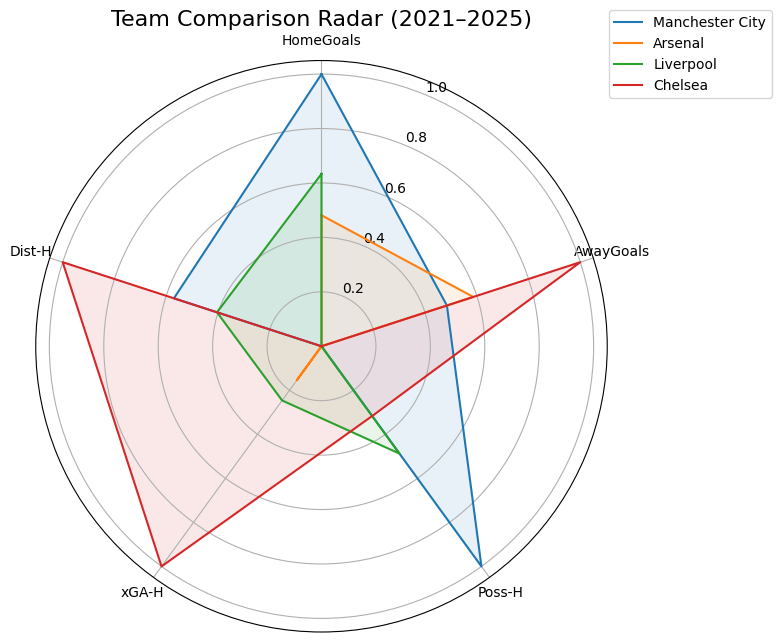

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Select teams to compare
teams_to_compare = ['Manchester City', 'Arsenal', 'Liverpool', 'Chelsea']

# Choose key features
features = [
    'HomeGoals',       # Offensive power
    'AwayGoals',       # Defensive solidity (inverse)
    'Poss-H',          # Ball possession
    'xGA-H',           # Expected goals conceded
    'Dist-H'           # Average shot distance
]

# Aggregate averages per team (consider Home matches)
team_avg = df_reduced[df_reduced['Home'].isin(teams_to_compare)].groupby('Home')[features].mean()

# Normalize feature scales (optional: [0,1] scaling for better radar shape)
team_avg_normalized = (team_avg - team_avg.min()) / (team_avg.max() - team_avg.min())

# Setup for radar chart
labels = features
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Initialize plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each team
for team in teams_to_compare:
    values = team_avg_normalized.loc[team].tolist()
    values += values[:1]  # repeat first value to close the circle
    ax.plot(angles, values, label=team)
    ax.fill(angles, values, alpha=0.1)

# Style the radar chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Team Comparison Radar (2021–2025)', size=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


C:\Users\ProUser\AppData\Local\Temp\ipykernel_15244\191576666.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




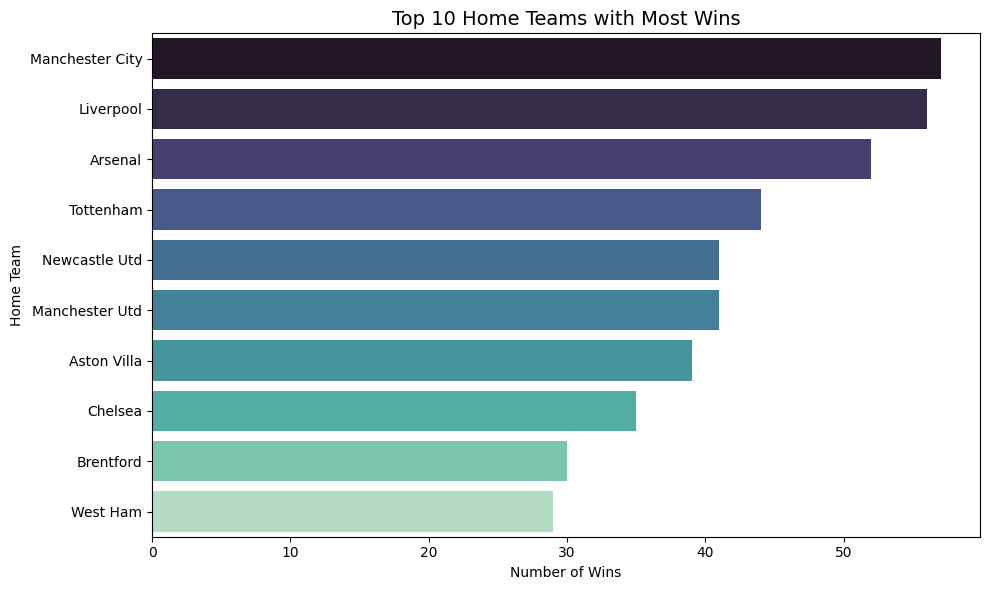

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for home wins only
home_wins = df_reduced[df_reduced['Result'] == 1]

# Count home wins per team
home_win_counts = home_wins['Home'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=home_win_counts.values, y=home_win_counts.index, palette='mako')

plt.title("Top 10 Home Teams with Most Wins", fontsize=14)
plt.xlabel("Number of Wins")
plt.ylabel("Home Team")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

**POISSON**

In [21]:
from sklearn.linear_model import TweedieRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Drop non-numeric and unnecessary columns
df = df.drop(columns=['Date', 'Attendance', 'Home_clean', 'Away_clean', 'Season'], errors='ignore')
df = df.dropna()
df_reduced = df.select_dtypes(include=['number'])

# 5% holdout
holdout_size = int(0.05 * len(df_reduced))
df_train_full = df_reduced.iloc[:-holdout_size].copy()
df_final_unseen = df_reduced.iloc[-holdout_size:].copy()

# Split features and targets
X_train = df_train_full.drop(columns=['HomeGoals', 'AwayGoals', 'Result'], errors='ignore')
y_train = df_train_full[['HomeGoals', 'AwayGoals']]
X_test = df_final_unseen.drop(columns=['HomeGoals', 'AwayGoals', 'Result'], errors='ignore')
y_test = df_final_unseen[['HomeGoals', 'AwayGoals']]

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Split features and targets
X_train = df_train_full.drop(columns=['HomeGoals', 'AwayGoals', 'Result'], errors='ignore')
y_train = df_train_full[['HomeGoals', 'AwayGoals']]
X_test = df_final_unseen.drop(columns=['HomeGoals', 'AwayGoals', 'Result'], errors='ignore')
y_test = df_final_unseen[['HomeGoals', 'AwayGoals']]

In [23]:
from sklearn.linear_model import PoissonRegressor
import numpy as np

# Fit MultiOutput Poisson model
poisson_model = MultiOutputRegressor(PoissonRegressor(max_iter=10000))
poisson_model.fit(X_train_scaled, y_train)

# Predict on the holdout set
y_pred_p = poisson_model.predict(X_test_scaled)
y_pred_p = np.clip(y_pred_p, 0, None)  # Clamp to non-negative values

# Round for classification metrics
pred_home_p = np.round(y_pred_p[:, 0]).astype(int)
pred_away_p = np.round(y_pred_p[:, 1]).astype(int)
true_home_p = y_test['HomeGoals'].values
true_away_p = y_test['AwayGoals'].values

# Calculate metrics
home_mae_p = mean_absolute_error(true_home_p, y_pred_p[:, 0])
away_mae_p = mean_absolute_error(true_away_p, y_pred_p[:, 1])
home_rmse_p = np.sqrt(mean_squared_error(true_home_p, y_pred_p[:, 0]))
away_rmse_p = np.sqrt(mean_squared_error(true_away_p, y_pred_p[:, 1]))

# Outcome logic
def get_outcome(home, away):
    if home > away:
        return "HomeWin"
    elif home < away:
        return "AwayWin"
    else:
        return "Draw"

pred_outcomes_p = [get_outcome(h, a) for h, a in zip(pred_home_p, pred_away_p)]
actual_outcomes_p = [get_outcome(h, a) for h, a in zip(true_home_p, true_away_p)]

# Classification-style metrics
exact_score_accuracy_p = ((pred_home_p == true_home_p) & (pred_away_p == true_away_p)).mean() * 100
outcome_accuracy_p = (np.array(pred_outcomes_p) == np.array(actual_outcomes_p)).mean() * 100

# Return evaluation summary
{
    "Exact Score Accuracy (%)": round(exact_score_accuracy_p, 2),
    "Correct Outcome Accuracy (%)": round(outcome_accuracy_p, 2),
    "Home Goal MAE": round(home_mae_p, 3),
    "Away Goal MAE": round(away_mae_p, 3),
    "Home Goal RMSE": round(home_rmse_p, 3),
    "Away Goal RMSE": round(away_rmse_p, 3)
}

{'Exact Score Accuracy (%)': np.float64(15.79),
 'Correct Outcome Accuracy (%)': np.float64(42.11),
 'Home Goal MAE': 0.718,
 'Away Goal MAE': 0.79,
 'Home Goal RMSE': np.float64(0.926),
 'Away Goal RMSE': np.float64(0.989)}

**Negative Binomial**

In [24]:
import statsmodels.api as sm

# Add constant term
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Train Negative Binomial separately for home and away
nb_home_model = sm.GLM(y_train['HomeGoals'], X_train_sm, family=sm.families.NegativeBinomial())
nb_away_model = sm.GLM(y_train['AwayGoals'], X_train_sm, family=sm.families.NegativeBinomial())

nb_home_result = nb_home_model.fit()
nb_away_result = nb_away_model.fit()

y_pred_nb = np.column_stack([
    np.clip(nb_home_result.predict(X_test_sm), 0, None),
    np.clip(nb_away_result.predict(X_test_sm), 0, None)
])

# Predict
y_home_pred_nb = nb_home_result.predict(X_test_sm)
y_away_pred_nb = nb_away_result.predict(X_test_sm)

c:\Users\ProUser\Desktop\Abudi Files\AUB_ME\Data Driven\Final project\NewDayra\dayraa\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\ProUser\Desktop\Abudi Files\AUB_ME\Data Driven\Final project\NewDayra\dayraa\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



In [25]:
# Round and clip
pred_home_nb = np.round(np.clip(y_home_pred_nb, 0, None)).astype(int)
pred_away_nb = np.round(np.clip(y_away_pred_nb, 0, None)).astype(int)
true_home_nb = y_test['HomeGoals'].values
true_away_nb = y_test['AwayGoals'].values

# Evaluation
home_mae_nb = mean_absolute_error(true_home_nb, y_home_pred_nb)
away_mae_nb = mean_absolute_error(true_away_nb, y_away_pred_nb)
home_rmse_nb = np.sqrt(mean_squared_error(true_home_nb, y_home_pred_nb))
away_rmse_nb = np.sqrt(mean_squared_error(true_away_nb, y_away_pred_nb))

def get_outcome(home, away):
    if home > away: return "HomeWin"
    elif home < away: return "AwayWin"
    else: return "Draw"

pred_outcomes_nb = [get_outcome(h, a) for h, a in zip(pred_home_nb, pred_away_nb)]
actual_outcomes_nb = [get_outcome(h, a) for h, a in zip(true_home_nb, true_away_nb)]

exact_score_accuracy_nb = ((pred_home_nb == true_home_nb) & (pred_away_nb == true_away_nb)).mean() * 100
outcome_accuracy_nb = (np.array(pred_outcomes_nb) == np.array(actual_outcomes_nb)).mean() * 100

In [26]:
# Return evaluation summary
{
    "Exact Score Accuracy for NB (%)": round(exact_score_accuracy_nb, 2),
    "Correct Outcome Accuracy for NB (%)": round(outcome_accuracy_nb, 2),
    "Home Goal MAE": round(home_mae_nb, 3),
    "Away Goal MAE": round(away_mae_nb, 3),
    "Home Goal RMSE": round(home_rmse_nb, 3),
    "Away Goal RMSE": round(away_rmse_nb, 3)
}

{'Exact Score Accuracy for NB (%)': np.float64(10.53),
 'Correct Outcome Accuracy for NB (%)': np.float64(57.89),
 'Home Goal MAE': 1.048,
 'Away Goal MAE': 0.822,
 'Home Goal RMSE': np.float64(1.372),
 'Away Goal RMSE': np.float64(1.017)}

**For tweedieregressor**,
We find the best values for *power* and *alpha* using grid search 

In [29]:
from sklearn.linear_model import TweedieRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
tweedie = MultiOutputRegressor(TweedieRegressor(max_iter=4000))

# Define parameter grid
param_grid = {
    'estimator__power': [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],  # range between Poisson (1) and Gamma (2)
    'estimator__alpha': [0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# Set up GridSearch
grid = GridSearchCV(tweedie, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

# Best model
best_model = grid.best_estimator_

# Predict
y_pred = best_model.predict(X_test_scaled)
y_pred_tweedie = y_pred.copy()
y_pred = np.clip(y_pred, 0, None)

# Round predictions
pred_home = np.round(y_pred[:, 0]).astype(int)
pred_away = np.round(y_pred[:, 1]).astype(int)
true_home = y_test['HomeGoals'].values
true_away = y_test['AwayGoals'].values

# Evaluation
home_mae = mean_absolute_error(true_home, y_pred[:, 0])
away_mae = mean_absolute_error(true_away, y_pred[:, 1])
home_rmse = np.sqrt(mean_squared_error(true_home, y_pred[:, 0]))
away_rmse = np.sqrt(mean_squared_error(true_away, y_pred[:, 1]))

def get_outcome(home, away):
    if home > away: return "HomeWin"
    elif home < away: return "AwayWin"
    else: return "Draw"

pred_outcomes = [get_outcome(h, a) for h, a in zip(pred_home, pred_away)]
actual_outcomes = [get_outcome(h, a) for h, a in zip(true_home, true_away)]

exact_score_accuracy = ((pred_home == true_home) & (pred_away == true_away)).mean() * 100
outcome_accuracy = (np.array(pred_outcomes) == np.array(actual_outcomes)).mean() * 100

# Output results
{
    "Best Parameters": grid.best_params_,
    "Exact Score Accuracy for Tweedie (%)": round(exact_score_accuracy, 2),
    "Correct Outcome Accuracy for Tweedie (%)": round(outcome_accuracy, 2),
    "Home Goal MAE": round(home_mae, 3),
    "Away Goal MAE": round(away_mae, 3),
    "Home Goal RMSE": round(home_rmse, 3),
    "Away Goal RMSE": round(away_rmse, 3)
}


Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'Best Parameters': {'estimator__alpha': 1.0, 'estimator__power': 1.1},
 'Exact Score Accuracy for Tweedie (%)': np.float64(15.79),
 'Correct Outcome Accuracy for Tweedie (%)': np.float64(42.11),
 'Home Goal MAE': 0.722,
 'Away Goal MAE': 0.796,
 'Home Goal RMSE': np.float64(0.929),
 'Away Goal RMSE': np.float64(0.996)}

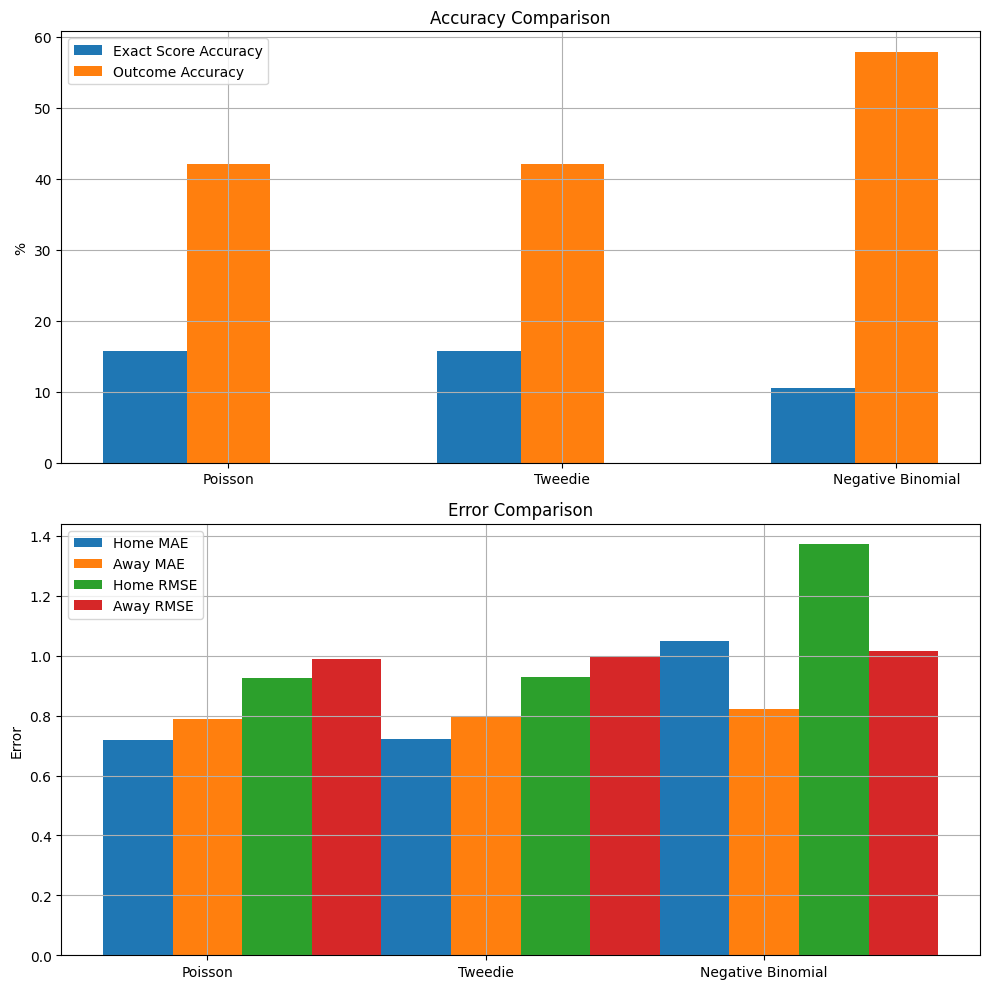

In [30]:
model_names = ["Poisson", "Tweedie", "Negative Binomial"]

exact_score = [15.79, 15.79, 10.53]
outcome_acc = [42.11, 42.11, 57.89]
home_mae = [0.718, 0.722, 1.048]
away_mae = [0.79, 0.796, 0.822]
home_rmse = [0.926, 0.929, 1.372]
away_rmse = [0.989, 0.996, 1.017]

# Set width
x = np.arange(len(model_names))
width = 0.25

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Accuracy metrics
axs[0].bar(x - width, exact_score, width, label="Exact Score Accuracy")
axs[0].bar(x, outcome_acc, width, label="Outcome Accuracy")
axs[0].set_title("Accuracy Comparison")
axs[0].set_ylabel("%")
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_names)
axs[0].legend()
axs[0].grid(True)

# Error metrics
axs[1].bar(x - width, home_mae, width, label="Home MAE")
axs[1].bar(x, away_mae, width, label="Away MAE")
axs[1].bar(x + width, home_rmse, width, label="Home RMSE")
axs[1].bar(x + 2*width, away_rmse, width, label="Away RMSE")
axs[1].set_title("Error Comparison")
axs[1].set_ylabel("Error")
axs[1].set_xticks(x)
axs[1].set_xticklabels(model_names)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

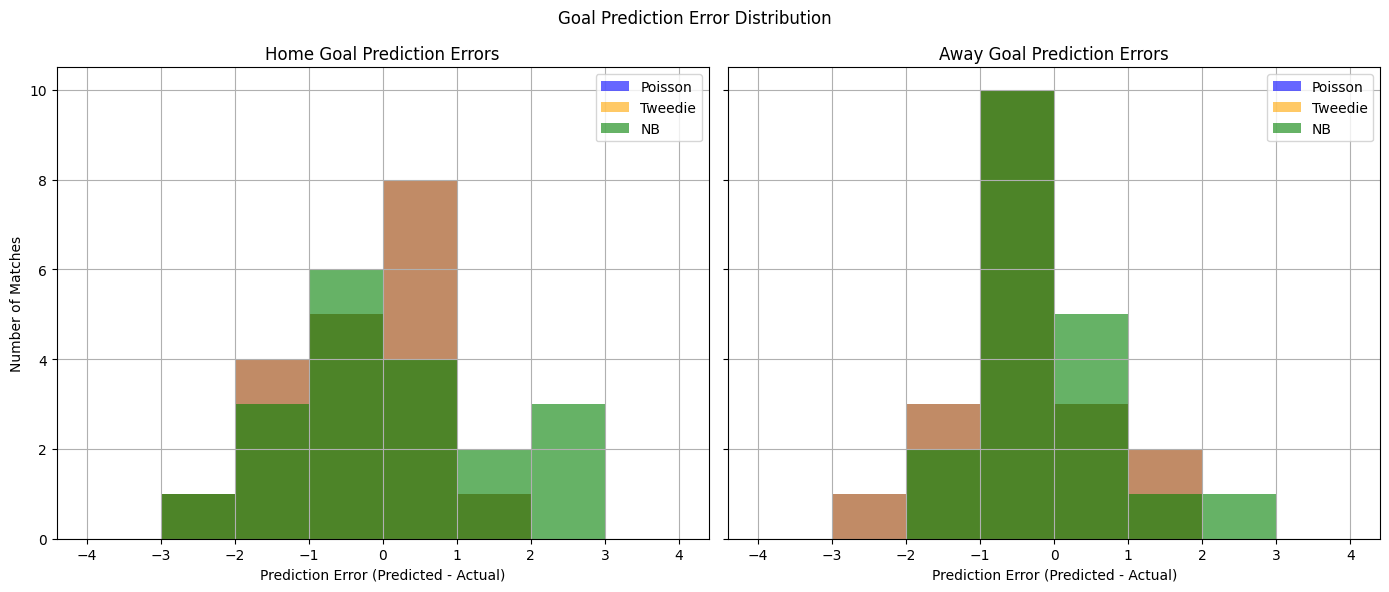

In [31]:
#Calculating error for each model 
#To plot Goal Error Distribution
error_poisson_home = y_pred[:, 0] - true_home
error_tweedie_home = y_pred_tweedie[:, 0] - true_home
error_nb_home = y_pred_nb[:, 0] - true_home

error_poisson_away = y_pred_p[:, 1] - true_away
error_tweedie_away = y_pred_tweedie[:, 1] - true_away
error_nb_away = y_pred_nb[:, 1] - true_away

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

bins = np.arange(-4, 5, 1)

axs[0].hist(error_poisson_home, bins=bins, alpha=0.6, label="Poisson", color="blue")
axs[0].hist(error_tweedie_home, bins=bins, alpha=0.6, label="Tweedie", color="orange")
axs[0].hist(error_nb_home, bins=bins, alpha=0.6, label="NB", color="green")
axs[0].set_title("Home Goal Prediction Errors")
axs[0].set_xlabel("Prediction Error (Predicted - Actual)")
axs[0].set_ylabel("Number of Matches")
axs[0].legend()
axs[0].grid(True)

axs[1].hist(error_poisson_away, bins=bins, alpha=0.6, label="Poisson", color="blue")
axs[1].hist(error_tweedie_away, bins=bins, alpha=0.6, label="Tweedie", color="orange")
axs[1].hist(error_nb_away, bins=bins, alpha=0.6, label="NB", color="green")
axs[1].set_title("Away Goal Prediction Errors")
axs[1].set_xlabel("Prediction Error (Predicted - Actual)")
axs[1].legend()
axs[1].grid(True)

plt.suptitle("Goal Prediction Error Distribution")
plt.tight_layout()
plt.show()

This figure presents the distribution of prediction errors for home and away teams. A prediction error of 0 indicates a perfect score prediction, while negative and positive values correspond to underestimation and overestimation of actual goals, respectively. For home goals, all three models are centered around zero, with Tweedie showing the sharpest peak at zero, suggesting better calibration. In contrast, Negative Binomial exhibits a wider spread with several large over-predictions, which aligns with its higher RMSE despite strong outcome accuracy. For away goals, the distributions are more tightly clustered, with Negative Binomial showing the most concentrated mass at zero, indicating its effectiveness at away goal estimation. Overall, the plot highlights the trade-off between exact score accuracy and prediction sharpness: Tweedie offers more balanced and consistent predictions, while Negative Binomial shows greater variance but excels in match outcome classification.

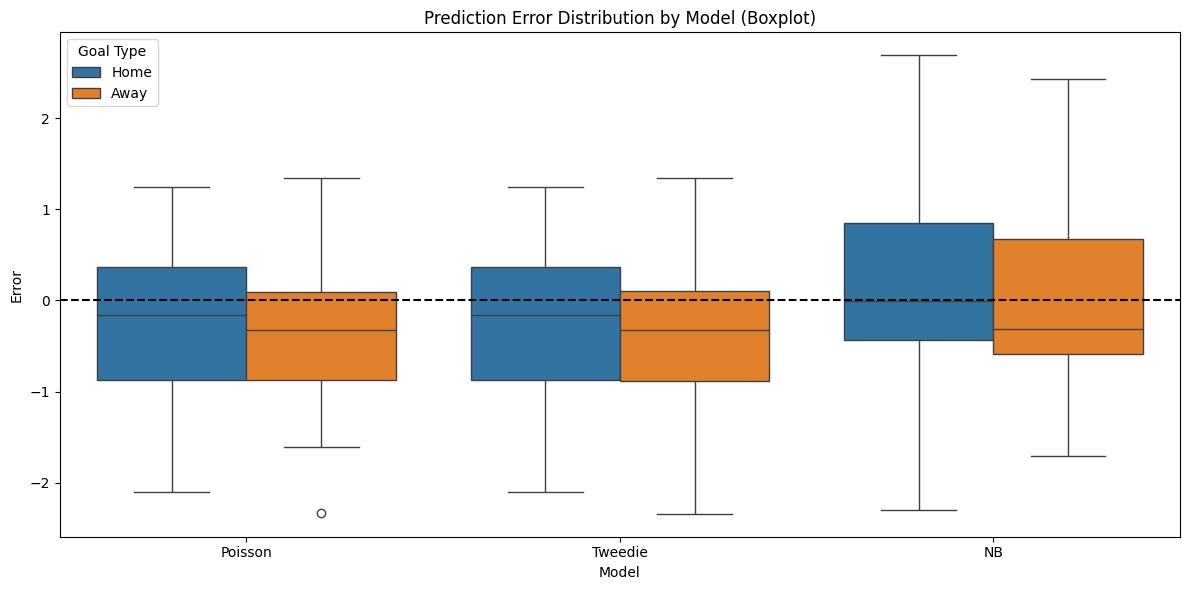

In [32]:
errors_df = pd.DataFrame({
    "Poisson Home": error_poisson_home,
    "Tweedie Home": error_tweedie_home,
    "NB Home": error_nb_home,
    "Poisson Away": error_poisson_away,
    "Tweedie Away": error_tweedie_away,
    "NB Away": error_nb_away
})

# Melt for seaborn
errors_long = errors_df.melt(var_name="Model_Goal", value_name="Error")
errors_long['Model'] = errors_long['Model_Goal'].str.extract(r'^(.*?) ')
errors_long['Goal Type'] = errors_long['Model_Goal'].str.extract(r'(Home|Away)')

# Box Plot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=errors_long, x="Model", y="Error", hue="Goal Type")
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Error Distribution by Model (Boxplot)")
plt.tight_layout()
plt.show()

The boxplot shows the dispersion of home and away goal prediction errors in the three models. Tweedie and Poisson appear almost identical having a tight interquartile range and symmetrical dispersion, indicating balanced and stable predictions. Negative Binomial is the most dispersed with bigger outliers, indicating more variability and the occasional over-prediction.

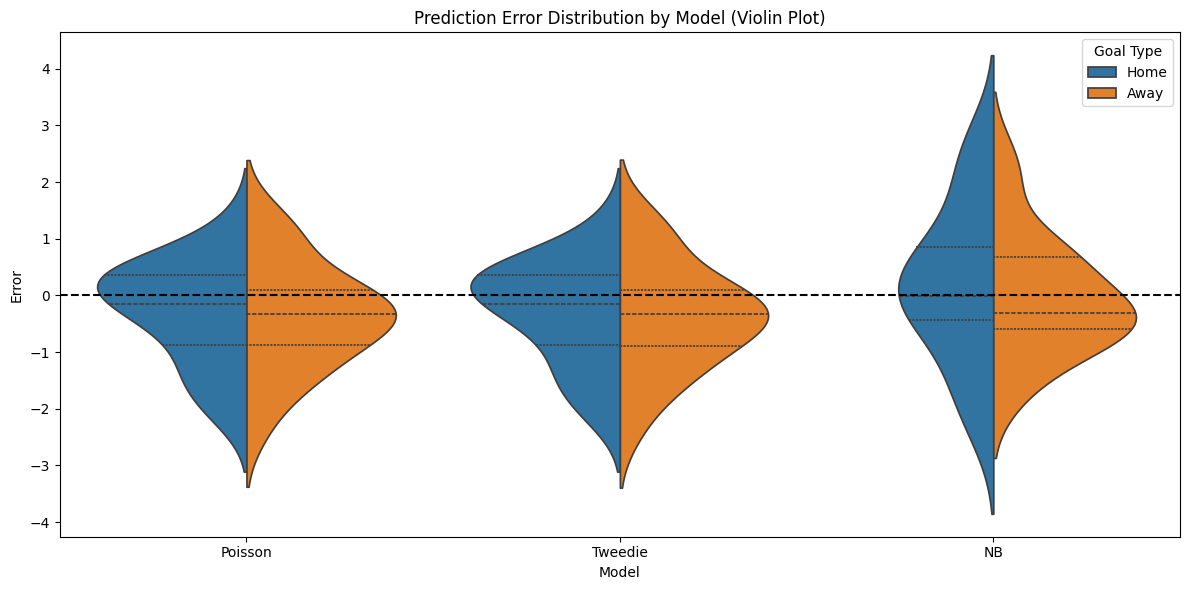

In [33]:
# Violin Plot 
plt.figure(figsize=(12, 6))
sns.violinplot(data=errors_long, x="Model", y="Error", hue="Goal Type", split=True, inner="quartile")
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Error Distribution by Model (Violin Plot)")
plt.tight_layout()
plt.show()

The violin plot reveals the full distribution of errors for each model. Tweedie and Poisson are almost identical, showing dense, symmetric core with few extreme deviations, suggesting stable and concentrated predictions. On the other hand, Negative Binomial displays a wider, flatter distribution with longer tails, reflecting greater variability and more frequent large errors.

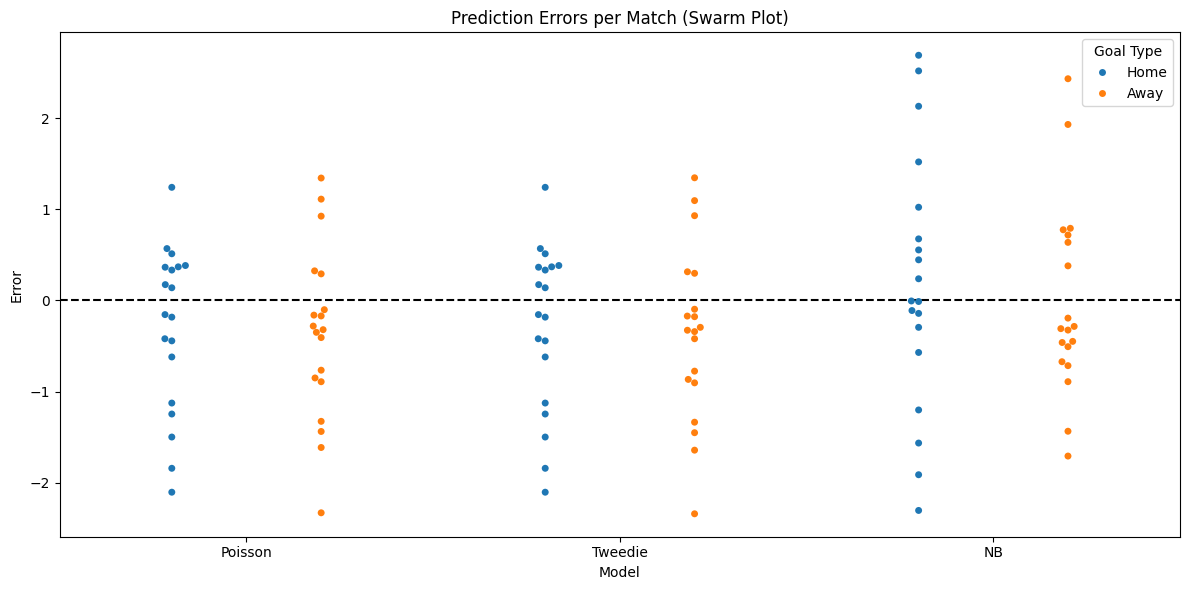

In [34]:
# PLOT 3: Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=errors_long, x="Model", y="Error", hue="Goal Type", dodge=True)
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Errors per Match (Swarm Plot)")
plt.tight_layout()
plt.show()

The swarm plot shows single prediction errors per game so that one gets an instant idea of how errors are scattered point-by-point. Poisson and Tweedie are clustered more tightly around zero since they suggest more stable predictions. Negative Binomial instead has more vertical spread, indicating larger and more variable errors throughout games.

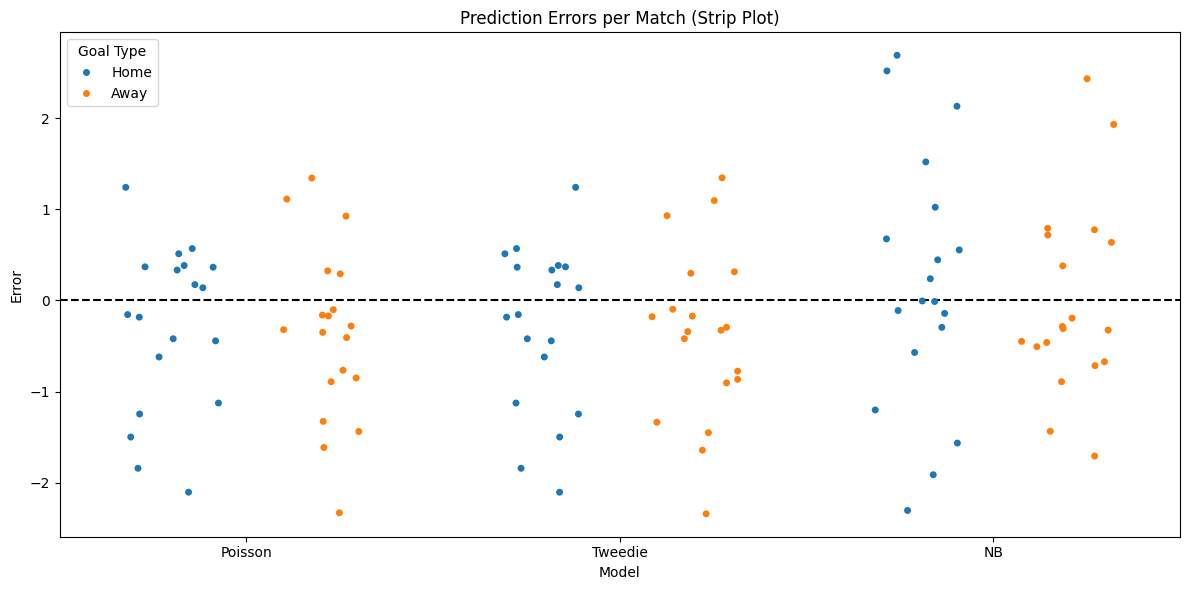

In [35]:
# PLOT 4: Strip Plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=errors_long, x="Model", y="Error", hue="Goal Type", dodge=True, jitter=0.25)
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Errors per Match (Strip Plot)")
plt.tight_layout()
plt.show()

This strip plot shows the individual prediction errors of each match without overlapping, thereby facilitating the estimation of exact values and their spread. Poisson and Tweedie model errors are seen to be highly clustered around zero, indicating good and moderate predictive performance. However, errors pertaining to the Negative Binomial model are spread over a broader range, particularly in the positive direction, indicating overprediction bias in certain instances. The spread and balance among models at the individual sample level are brought out in this visual depiction.